<a href="https://colab.research.google.com/github/langodayyy/ml/blob/main/ML_week2_regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Lucky kuriawan Langoday** <br>
**Kelas: TI-3D** <br>
**Absen: 13** <br>

**Praktikum 1**

In [2]:
# Langkah 2: import Library
import numpy as np
import pandas as pd

# Langkah 3: Baca Data
data = pd.read_csv('dataset.csv')

# Langkah 4: Pemahaman terhadap data
data.head()
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


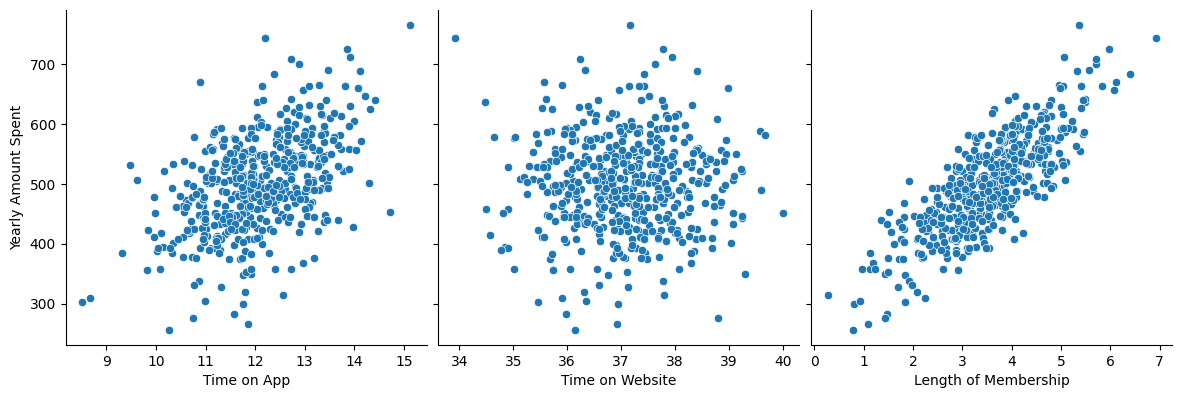

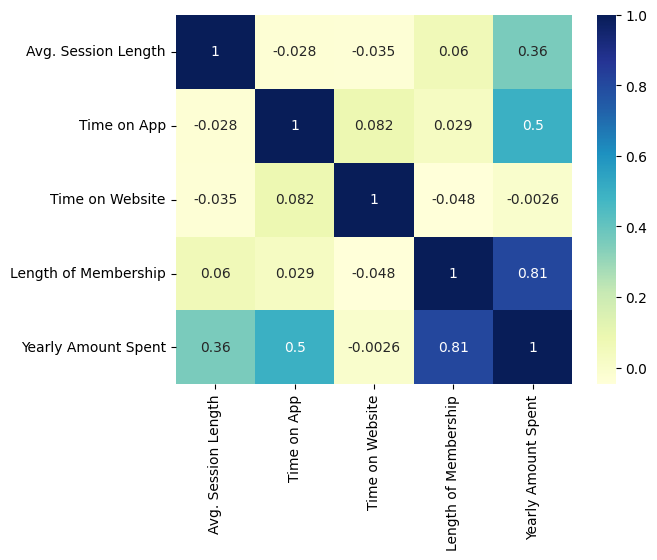

In [10]:
# Langkah 5: Visualisasi data
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

numerical_data = data.select_dtypes(include=['number'])

# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

# visualisasi korelasi dengan heatmap
sns.heatmap(numerical_data.corr(), cmap="YlGnBu", annot=True)
plt.show()



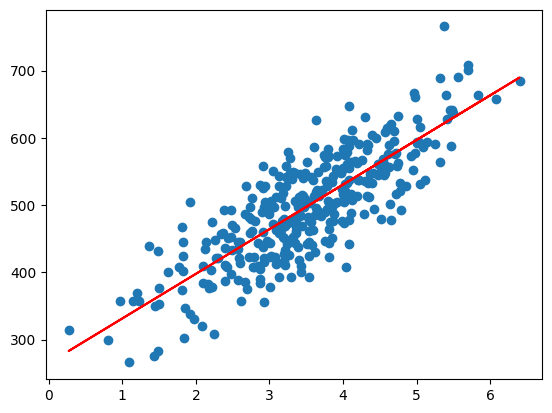

In [11]:
# Langkah 6: Regresi Linier
# membuat variabel bebas x dan y, contoh pengambilan dari analisis korelasi sebelumnya
x = data['Length of Membership']
y = data['Yearly Amount Spent']

# pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

# training model
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()

# visualisasi garis regresi
plt.scatter(x_train, y_train)
plt.plot(x_train, 265.2483 + 66.3015 * x_train, 'r')
plt.show()

<ipython-input-14-fb0167be704e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


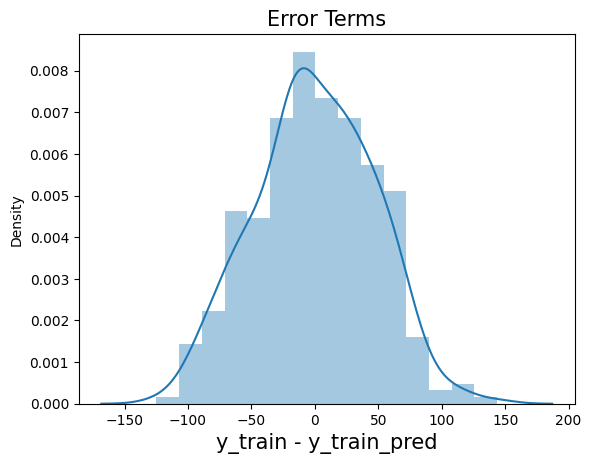

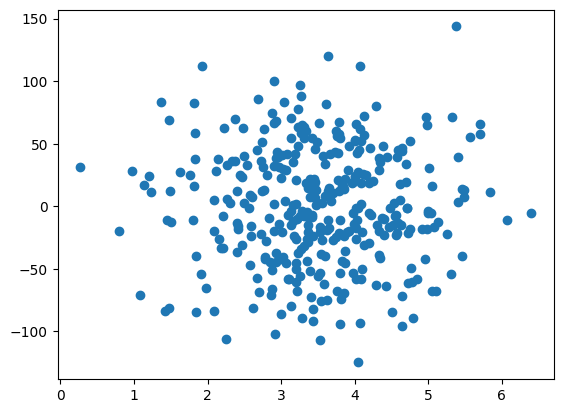

In [14]:
# Langkah 7: Analisis Residual
# prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(x_train_sm)
# menghitung residual
res = (y_train - y_train_pred)

# histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# scatter plot residual
plt.scatter(x_train, res)
plt.show()

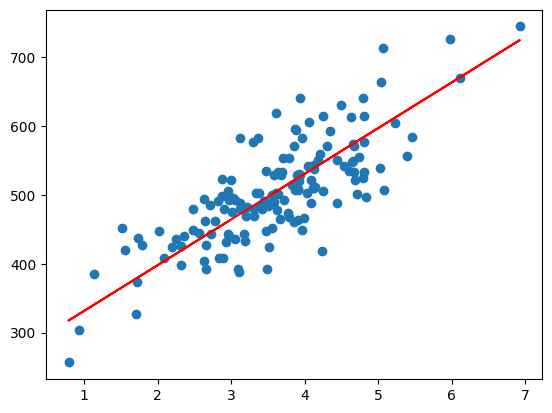

In [15]:
# Langkah 8:  prediksi pada data uji dan evaluasi model

# prediksi pada data uji
x_test_sm = sm.add_constant(x_test)
y_test_pred = lr.predict(x_test_sm)

# hitung nilai R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)
# visualisasi data dan hasil prediksi
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()


**Praktikum 2**

In [16]:
# langkah 1: mengimpor library
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# langkah 2: mengimpor dataset
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

In [21]:
# langkah 3: feature scaling
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

In [22]:
# langkah 4: fitting SVR ke dataset
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

<ipython-input-23-8e7fd682753d>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


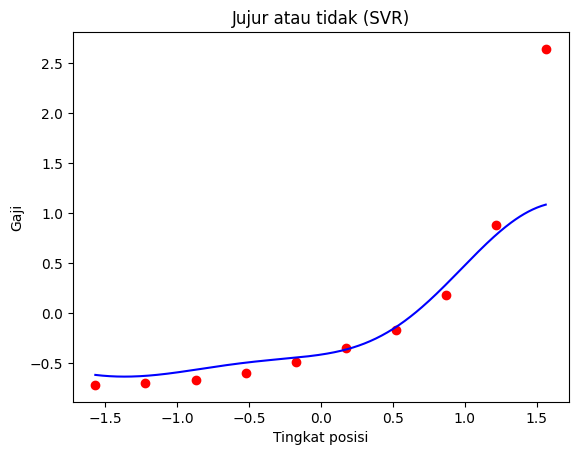

In [23]:
# langkah 5: visualisasi hasil svr
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [24]:
# langkah 6: Prediksi hasil
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

In [25]:
# langkah 7: menampilkan hasil
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [26]:
# langkah 9: evaluasi model SVR
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


**Tugas Praktikum**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression


data_2 = pd.read_csv('insurance.csv')
data_2.head()
data_2.shape
data_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


variable bebas (fitur) : age, sex, bmi, children, smoker, region <br>
variable target: charges

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


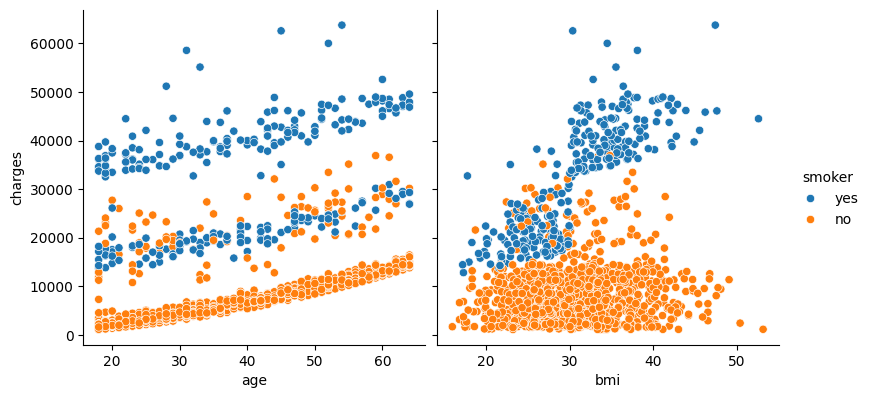

In [33]:
sns.pairplot(data_2, x_vars=['age', 'bmi'],
             y_vars='charges', size=4, aspect=1, kind='scatter', hue='smoker')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


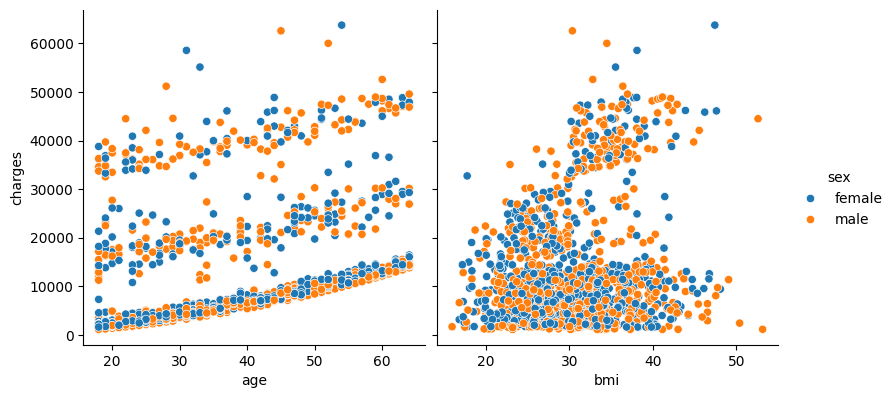

In [35]:
sns.pairplot(data_2, x_vars=['age', 'bmi'],
             y_vars='charges', size=4, aspect=1, kind='scatter',hue='sex')
plt.show()


Pada kedua scatter plot, hubungan yang jelas adalah bahwa individu yang memiliki BMI dan usia yang lebih tinggi cenderung membayar biaya medis lebih banyak.
Selain itu, perokok cenderung membayar lebih mahal dibandingkan non-perokok.

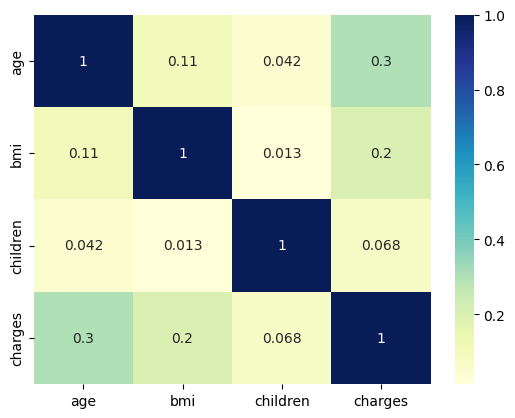

In [36]:
numerical_data_2 = data_2.select_dtypes(include=['float64', 'int64'])

# Menghitung korelasi dan menampilkan heatmap
sns.heatmap(numerical_data_2.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [43]:
X = data_2[['age', 'bmi', 'smoker']]
y = data_2['charges']

X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

<ipython-input-43-95b759bcf57b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})


In [44]:
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

print(f"Intercept B0: {model.intercept_}")
print(f"Koefisien Regresi: {model.coef_}")

y_pred = model.predict(X_test)


Intercept B0: -11170.514453590089
Koefisien Regresi: [  266.10629404   299.33904434 23499.67317566]


In [47]:
# Menghitung R-squared (R2), MAE, dan MSE dari model terlatih
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Menampilkan nilai R-squared, MAE, dan MSE
print(f"\nR-squared (R2): ",r2)
print(f"MAE (Mean Absolute Error): ", mae)
print(f"MSE (Mean Squared Error): ", mse)


R-squared (R2):  0.7916580391198964
MAE (Mean Absolute Error):  3927.5850813981397
MSE (Mean Squared Error):  32669703.02173369
